In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Thyroid_Diff.csv")
X = dataset.drop("Recurred", axis=1)
y = dataset["Recurred"]

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Risk', 'T', 'N', 'M', 'Stage', 'Response']
le = LabelEncoder()
for col in label_encode_cols:
    X[col] = le.fit_transform(X[col])

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
assert isinstance(X, pd.DataFrame)
onehot_encode_cols = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy',
                      'Thyroid Function','Physical Examination','Adenopathy',
                      'Pathology','Focality']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='if_binary'), onehot_encode_cols)],
    remainder='passthrough'
)
X_transformed = ct.fit_transform(X)
# Get new column names
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(onehot_encode_cols)
remaining_cols = [col for col in X.columns if col not in onehot_encode_cols]
all_cols = list(encoded_cols) + remaining_cols

# Convert to DataFrame with proper column names
X_df = pd.DataFrame(X_transformed, columns=all_cols)

# Optionally, print first few rows
#print(X_df.head())

In [5]:
y_encoded = LabelEncoder().fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_encoded, random_state=0,test_size=0.2) 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[51  0]
 [ 9 17]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.65      0.79        26

    accuracy                           0.88        77
   macro avg       0.93      0.83      0.85        77
weighted avg       0.90      0.88      0.88        77



MODEL FOUND ALL ACTUAL POSITIVE CASES SINCE RECALL = 100%, 
BUT SINCE THE PRECISION IS 85% THERE MIGHT BE CHANCES THAT 15% MIGHT BE FALSE POSITIVES

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {
    'n_neighbors': [3, 5, 7],           # Number of neighbors
    'weights': ['uniform', 'distance'],# Weight function
    'metric': ['euclidean', 'manhattan'] # Distance metric
}
# Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.908514013749339
KNeighborsClassifier(metric='manhattan', weights='distance')
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        51
           1       0.90      0.69      0.78        26

    accuracy                           0.87        77
   macro avg       0.88      0.83      0.85        77
weighted avg       0.87      0.87      0.87        77



INCLUDING ALGORITHMS AS PARAMETERS

In [14]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}
# Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 40, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9216287678476996
KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, metric='manhattan',
                     n_neighbors=3)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.65      0.79        26

    accuracy                           0.88        77
   macro avg       0.93      0.83      0.85        77
weighted avg       0.90      0.88      0.88        77



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average='weighted'))    
print('Recall is: ', recall_score(y_test, y_pred, average='weighted'))
print('F1-score is: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy is:  0.8831168831168831
Precision is:  0.9006493506493506
Recall is:  0.8831168831168831
F1-score is:  0.8756234337629687


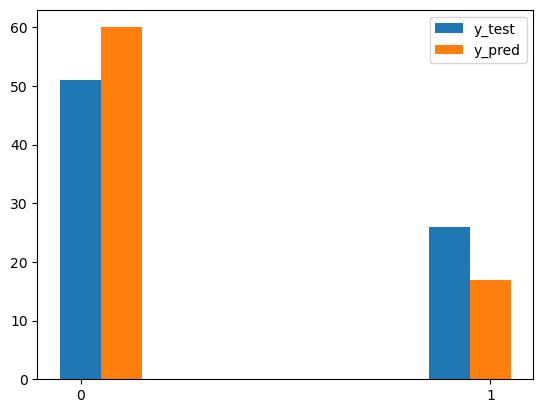

In [16]:
def plot_results(y_test, y_pred):
    fig = plt.figure()
    plt.hist(y_test, align='left')
    plt.hist(y_pred, align='right')
    plt.legend(['y_test', 'y_pred'])
    plt.xticks((0, 1))
    plt.show()
plot_results(y_test, y_pred)